In [105]:
library(fpp2)
library(gridExtra)
#library(ggpubr)

In [2]:
# 5. 교재 Forecasting: Principles and Practice, 섹션 6.9 (https://otexts.com/fppkr/decompositionexercises.html)의  6 번 연습문제
# 이 연습문제에서는 (호주 분기별 흙벽돌 생산. 1956 - 1994) bricksq 데이터를 사용하겠습니다

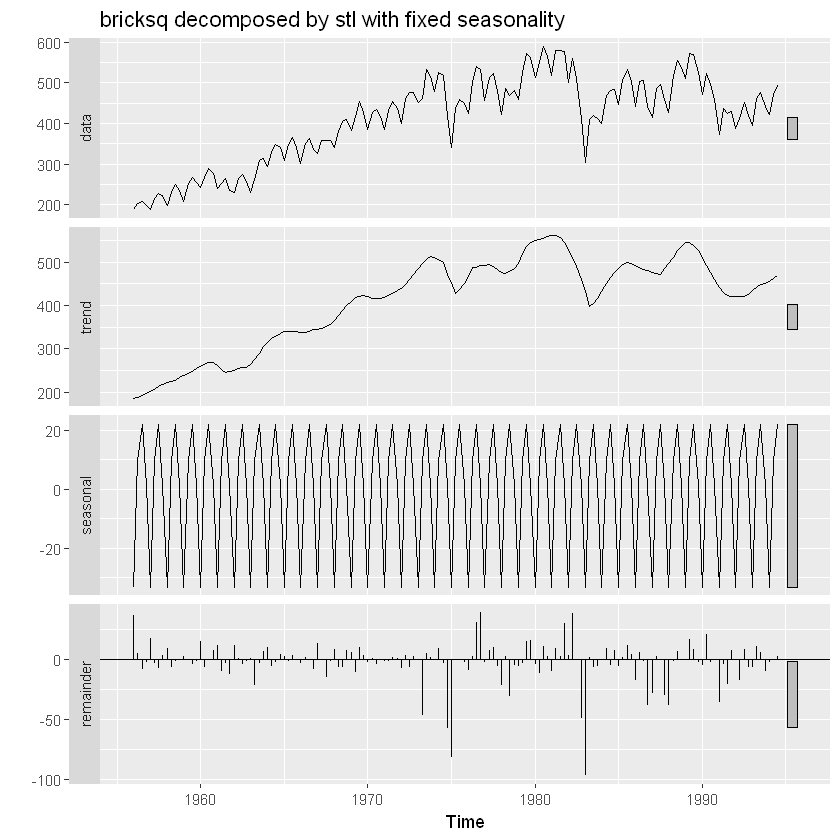

In [3]:
# a. 추세-주기와 계절성 지수를 계산하기 위해 STL 분해를 사용해봅시다. - 고정된 계절성.
# 계절성분이 시간에 따라서 변하지 않고, 안전한 옵션 "periodic"

bricksq_stl_seasonal_fixed <- stl(bricksq, s.window = "periodic", robust = TRUE)
autoplot(bricksq_stl_seasonal_fixed) + ggtitle("bricksq decomposed by stl with fixed seasonality")

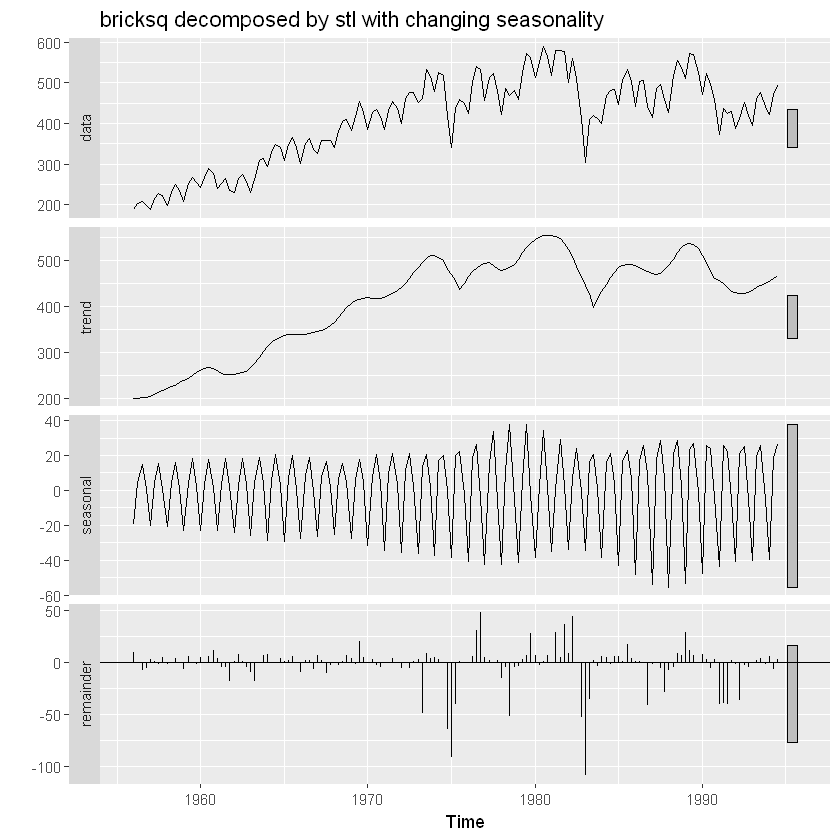

In [4]:
# a. 추세-주기와 계절성 지수를 계산하기 위해 STL 분해를 사용해봅시다. - 변하는 계절성.

# mstl() 함수는 s.window=13와 자동으로 선택한 t.window를 이용하여 STL 분해를 자동으로 수행
bricksq_stl_seasonal_changed_13 <- stl(bricksq, s.window = 13, robust = TRUE)
bricksq_stl_seasonal_changed_7 <- stl(bricksq, s.window = 7, robust = TRUE)
bricksq_stl_seasonal_changed_1 <- stl(bricksq, s.window = 1, robust = TRUE)
autoplot(bricksq_stl_seasonal_changed_7) + ggtitle("bricksq decomposed by stl with changing seasonality")

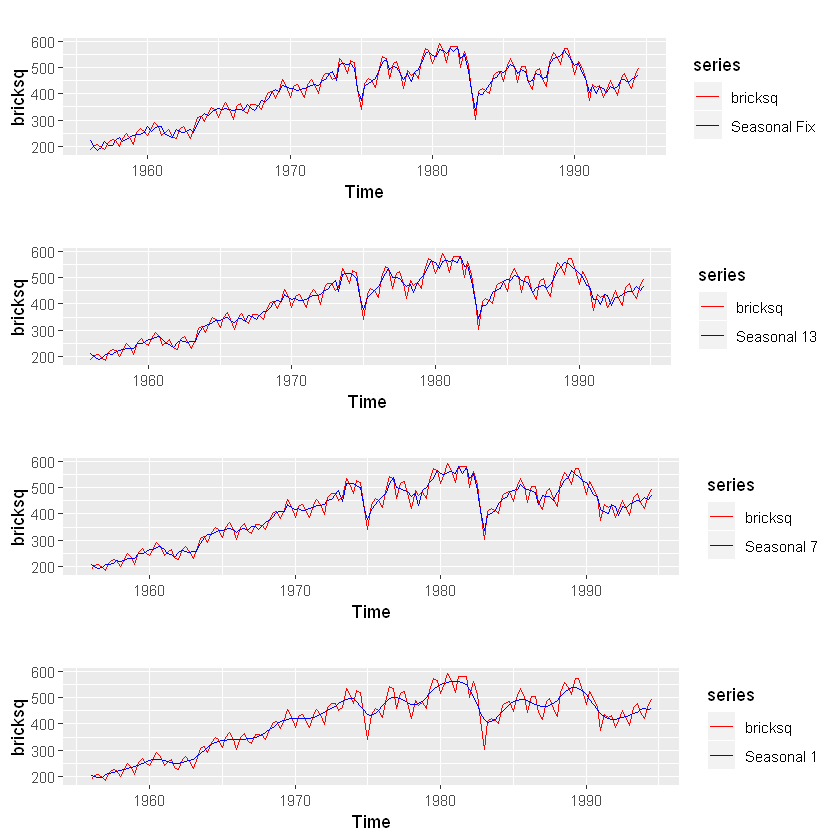

In [5]:
# b. 계절성으로 조정된 데이터를 계산하고 그려봅시다. [ 계절성으로 조정된 시계열을 계산하기 위해 seasadj() ]

# bricksq decomposed by stl with fixed seasonality
p1 <- autoplot(bricksq, series = "bricksq") +
    autolayer(seasadj(bricksq_stl_seasonal_fixed), series = "Seasonal Fix") + 
    scale_color_manual(values = c("red", "blue"))

# bricksq decomposed by stl with changing seasonality
p2 <- autoplot(bricksq, series = "bricksq") +
    autolayer(seasadj(bricksq_stl_seasonal_changed_13), series = "Seasonal 13") + 
    scale_color_manual(values = c("red", "blue"))

p3 <- autoplot(bricksq, series = "bricksq") +
    autolayer(seasadj(bricksq_stl_seasonal_changed_7), series = "Seasonal 7") + 
    scale_color_manual(values = c("red", "blue"))

p4 <- autoplot(bricksq, series = "bricksq") +
    autolayer(seasadj(bricksq_stl_seasonal_changed_1), series = "Seasonal 1") + 
    scale_color_manual(values = c("red", "blue"))

grid.arrange(p1, p2, p3, p4,
    layout_matrix = rbind(
        c(1),
        c(2),
        c(3),
        c(4)))

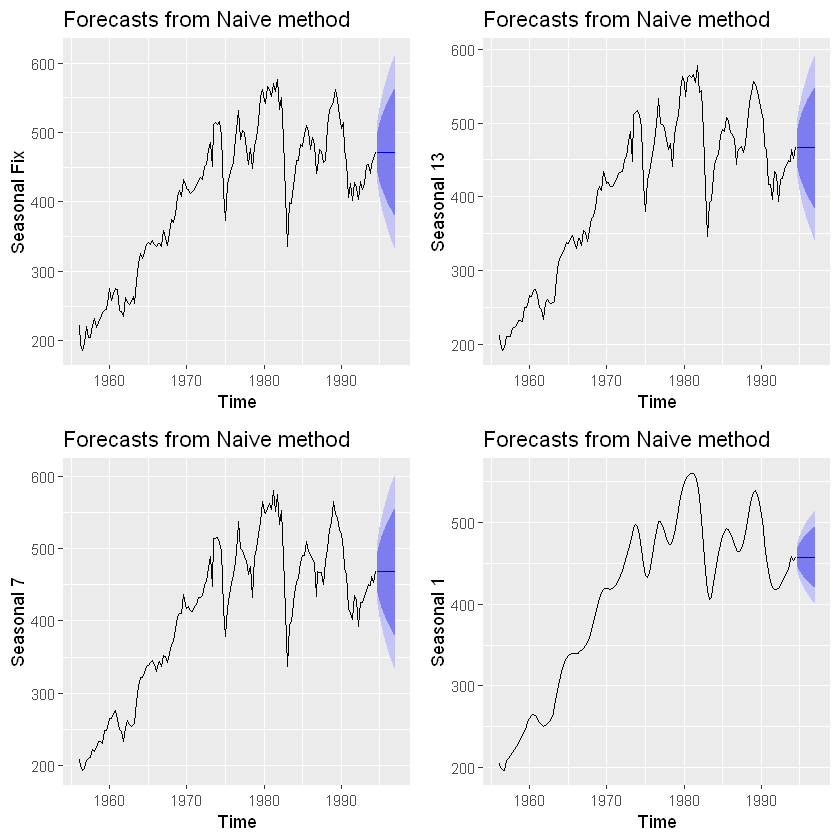

In [6]:
# https://otexts.com/fppkr/simple-methods.html
# c. 계절성으로 조정된 데이터의 예측치를 내기 위해 단순 기법을 사용해봅시다.

# bricksq decomposed by stl with fixed seasonality
p1 <- autoplot(naive(seasadj(bricksq_stl_seasonal_fixed))) + ylab('Seasonal Fix')

# bricksq decomposed by stl with changing seasonality
p2 <- autoplot(naive(seasadj(bricksq_stl_seasonal_changed_13))) + ylab('Seasonal 13')
p3 <- autoplot(naive(seasadj(bricksq_stl_seasonal_changed_7))) + ylab('Seasonal 7')
p4 <- autoplot(naive(seasadj(bricksq_stl_seasonal_changed_1))) + ylab('Seasonal 1')

grid.arrange(p1, p2, p3, p4,
    layout_matrix = rbind(
        c(1, 2),
        c(3, 4)))

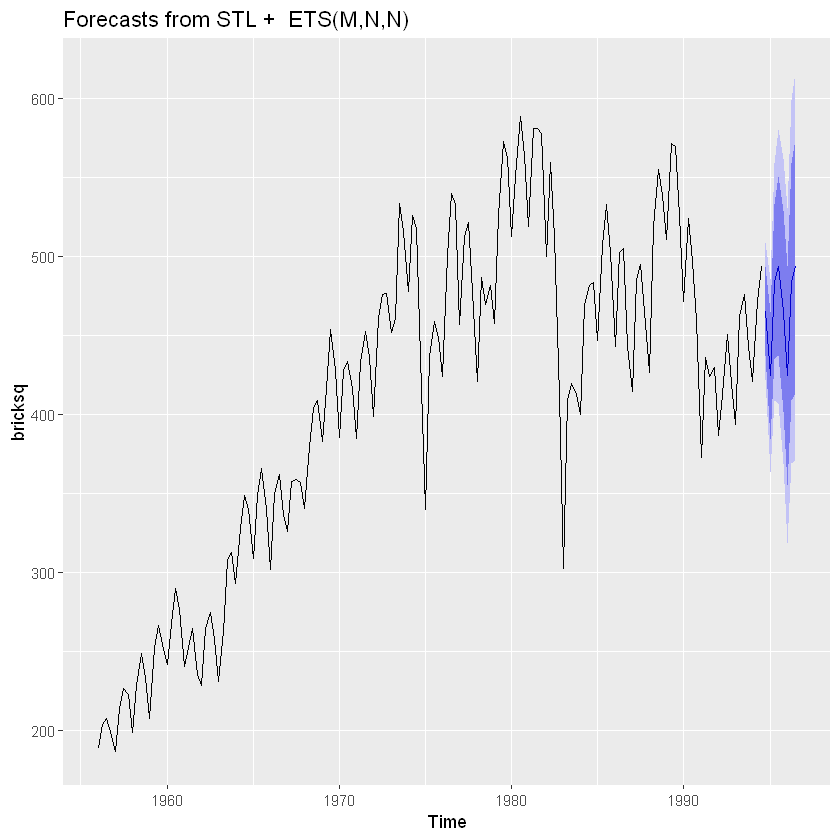

In [7]:
# d. 원본 데이터에 대한 예측치를 주는 결과를 재계절화하기 위해 stlf()를 사용해봅시다.

stlf_brick <- stlf(bricksq)
autoplot(stlf_brick)

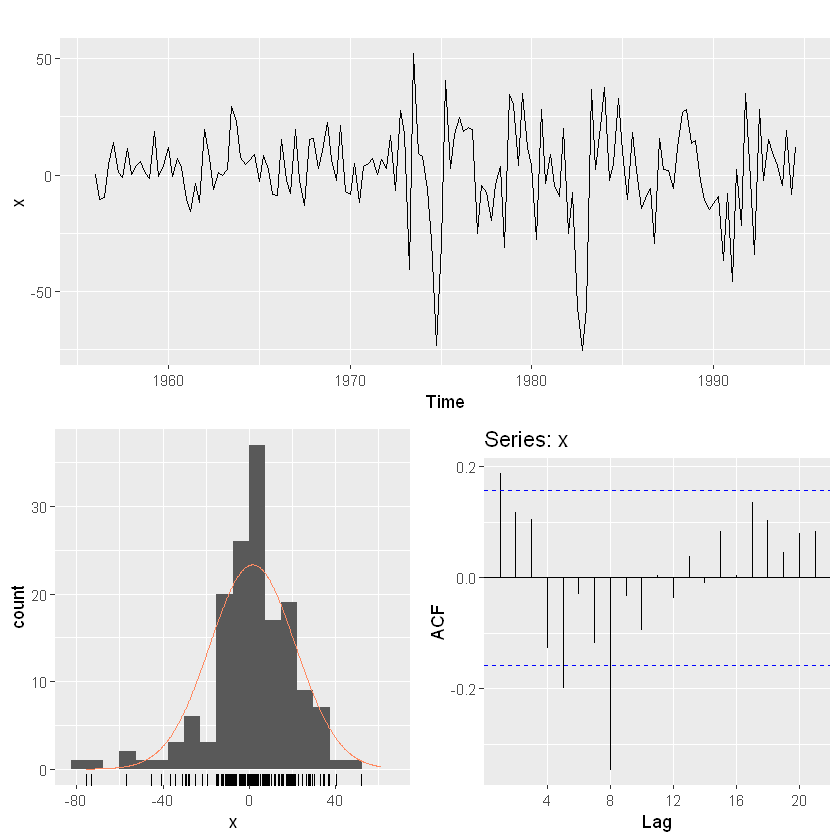

In [8]:
# e. 나머지 성분에 상관관계가 없는 것 같습니까?

x <- stlf_brick$residuals
p1 <- autoplot(x)
p2 <- gghistogram(x, add.normal = TRUE)
p3 <- ggAcf(x)

grid.arrange(p1, p2, p3,
    layout_matrix = rbind(
        c(1, 1),
        c(2, 3)))

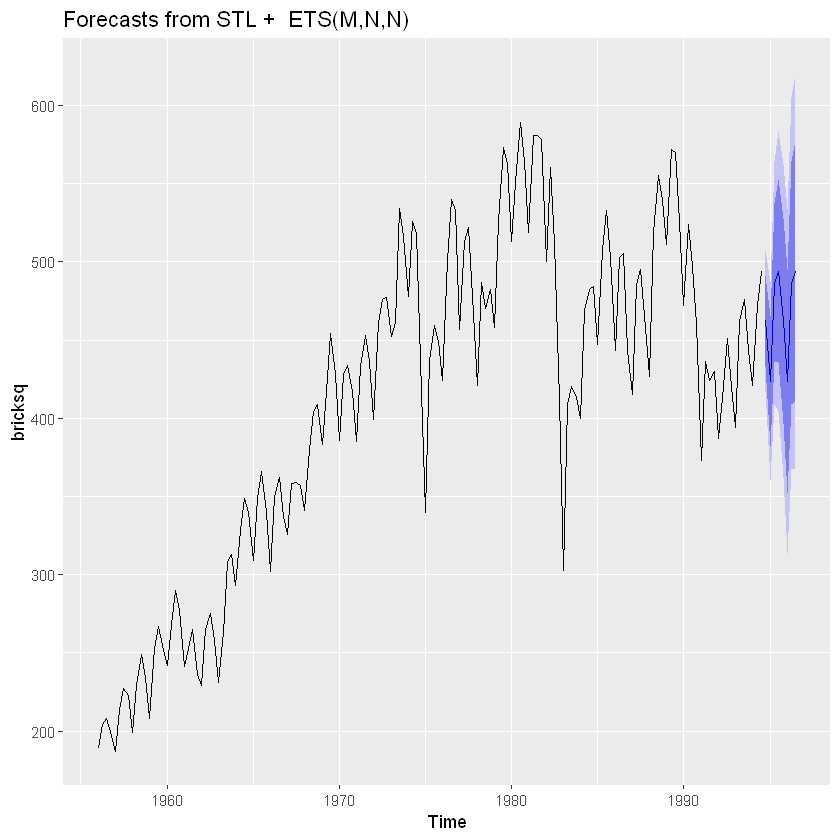

In [11]:
# f. 로버스트 STL 분해로 반복해봅시다. 어떤 차이가 생깁니까?

stlf_brick_robust <- stlf(bricksq, robust = TRUE)
autoplot(stlf_brick_robust)

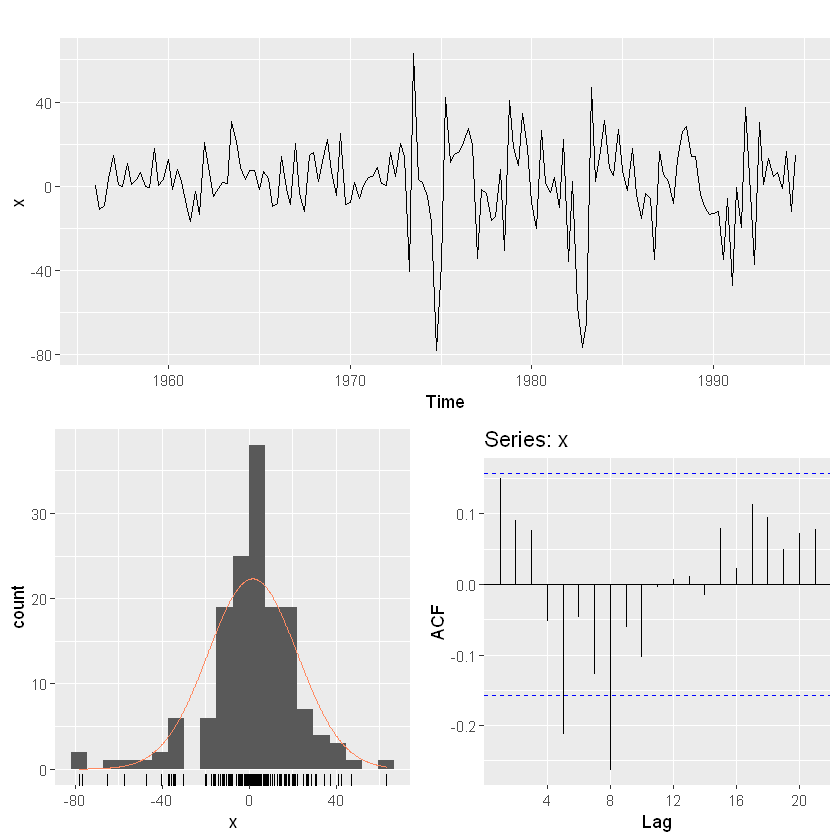

In [12]:
x <- stlf_brick_robust$residuals
p1 <- autoplot(x)
p2 <- gghistogram(x, add.normal = TRUE)
p3 <- ggAcf(x)

grid.arrange(p1, p2, p3,
    layout_matrix = rbind(
        c(1, 1),
        c(2, 3)))

In [102]:
# g. 마지막 2년 데이터로 구성된 테스트 데이터를 사용하여 stlf()로 얻은 예측값과 snaive()로 얻은 예측치를 비교해봅시다.
# 어떤 것이 더 낫습니까?
print(head(bricksq, 12))
print(tail(bricksq, 11))

test_data<- subset(bricksq, start = length(bricksq) - 7)
train_data <- subset(bricksq, end = length(bricksq) - 8)

     Qtr1 Qtr2 Qtr3 Qtr4
1956  189  204  208  197
1957  187  214  227  223
1958  199  229  249  234
     Qtr1 Qtr2 Qtr3 Qtr4
1992  387  413  451  420
1993  394  462  476  443
1994  421  472  494     


In [103]:
snaive(train_data)
stlf(train_data)

print(test_data)

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1992 Q4            430 366.2905 493.7095 332.5647 527.4353
1993 Q1            387 323.2905 450.7095 289.5647 484.4353
1993 Q2            413 349.2905 476.7095 315.5647 510.4353
1993 Q3            451 387.2905 514.7095 353.5647 548.4353
1993 Q4            430 339.9011 520.0989 292.2056 567.7944
1994 Q1            387 296.9011 477.0989 249.2056 524.7944
1994 Q2            413 322.9011 503.0989 275.2056 550.7944
1994 Q3            451 360.9011 541.0989 313.2056 588.7944

        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1992 Q4       423.9034 397.7584 450.0484 383.9181 463.8887
1993 Q1       378.9095 341.9154 415.9036 322.3319 435.4871
1993 Q2       441.9958 396.6620 487.3296 372.6637 511.3279
1993 Q3       450.9971 398.6202 503.3739 370.8936 531.1006
1993 Q4       423.9034 365.3107 482.4961 334.2936 513.5132
1994 Q1       378.9095 314.6874 443.1316 280.6903 477.1287
1994 Q2       441.9958 372.5879 511.4036 335.8457 548.1459
1994 Q3       450.9971 376.7541 525.2401 337.4523 564.5419

     Qtr1 Qtr2 Qtr3 Qtr4
1992                 420
1993  394  462  476  443
1994  421  472  494     


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.


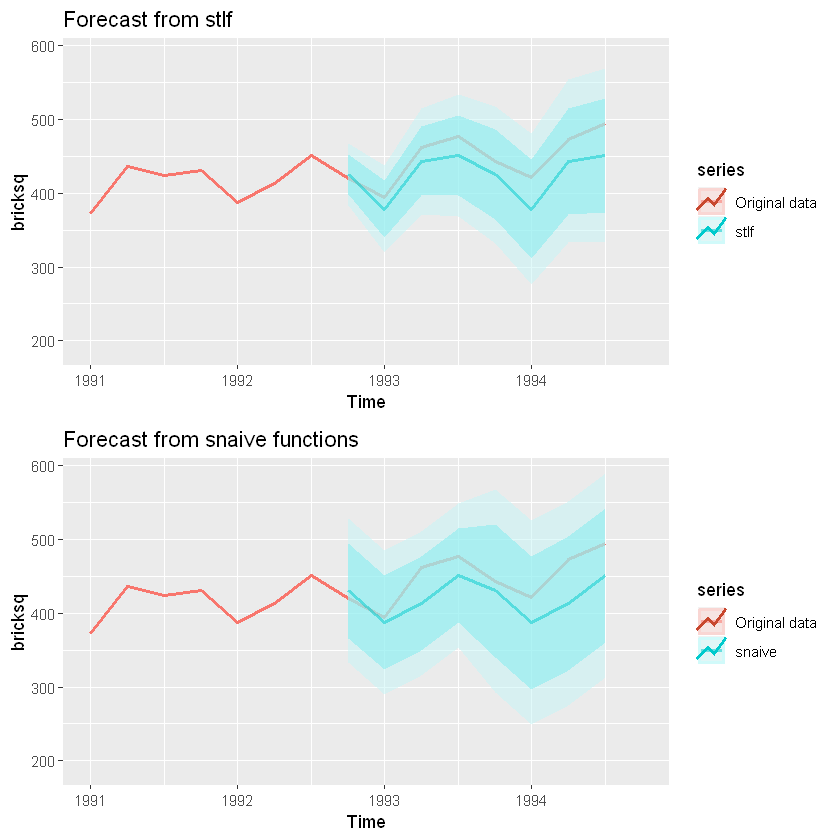

In [104]:
stlf_bricksq <- stlf(train_data, robust = TRUE)
snaive_bricksq <- snaive(train_data)

p1 <- autoplot(bricksq, series = "Original data", size = 1) +
    autolayer(stlf_bricksq, series = "stlf", PI = TRUE, alpha = 0.5, size = 1) + 
    xlim(1991, 1956 + length(bricksq)/4) +
    ggtitle("Forecast from stlf") 

p2 <- autoplot(bricksq, series = "Original data", size = 1) +
    autolayer(snaive_bricksq, series = "snaive", PI = TRUE, alpha = 0.5, size = 1) +
    xlim(1991, 1956 + length(bricksq)/4) +
    ggtitle("Forecast from snaive functions")

grid.arrange(p1, p2,
    layout_matrix = rbind(
        c(1),
        c(2))) 